### Import module

In [1]:
import tensorflow as tf
import keras
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
data = 'brain-mri-images-for-brain-tumor-detection/'
No_brain_tumor = 'no/'
Yes_brain_tumor = 'yes/'

### Creating a dataframe showing tumour class with corresponding filepath

In [3]:
dir_list = [No_brain_tumor, Yes_brain_tumor]
labels = ['No', 'Yes']


In [4]:
filepaths = []
labels_list = []


In [5]:
for i, label in zip(dir_list, labels):
    directory = os.path.join(data, i)
    for entry in os.scandir(directory):
        if entry.is_file():
            filepaths.append(entry.path)
            labels_list.append(label)


In [6]:
# Create a DataFrame
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels_list})


In [7]:
# Convert labels to binary (0 for No, 1 for Yes)
df['labels'] = df['labels'].apply(lambda x: 0 if x == 'No' else 1)


In [8]:
# Shuffle the DataFrame
df = shuffle(df, random_state=42)


In [9]:
def load_resize_image(path):
    image = load_img(path, target_size=(300, 300))
    return image


In [10]:
image_list = []
label_list = []


In [11]:

for idx, row in df.iterrows():
    path = row['filepaths']
    label = row['labels']
    image = load_resize_image(path)
    image_array = img_to_array(image)
    image_list.append(image_array)
    label_list.append(label)


In [12]:
X_data = np.array(image_list)
y_data = np.array(label_list)


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=42)


In [14]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


In [15]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [16]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [17]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


7/7 [==============================] - 13s 2s/step - loss: 3.0101 - accuracy: 0.0000e+00 - val_loss: 1.3661 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 1.2461 - accuracy: 0.0000e+00 - val_loss: 0.9909 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 1.0732 - accuracy: 0.0000e+00 - val_loss: 0.9491 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.9861 - accuracy: 0.0000e+00 - val_loss: 0.8520 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.9136 - accuracy: 0.0000e+00 - val_loss: 0.8082 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.8572 - accuracy: 0.0000e+00 - val_loss: 0.7705 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.8010 - accuracy: 0.0000e+00 - val_loss: 0.7332 - v

In [18]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.70774245262146
Test accuracy: 0.0


In [19]:
# Save the model
model.save('brain_tumor_model.h5')


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


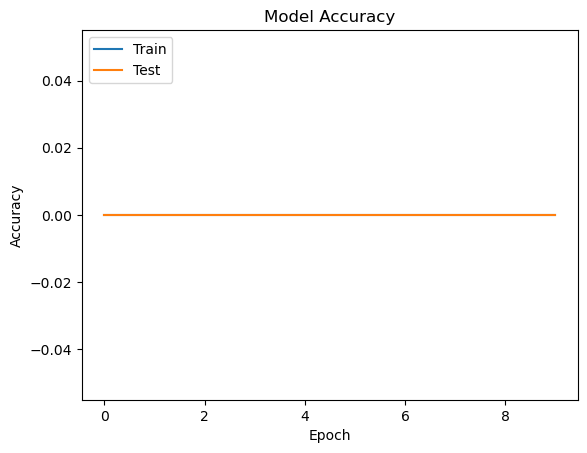

In [20]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()